# HOST

**Author:** _Matteo Bagagli_ - **Date:** _10/2021_ - **Version:** _2.4.3_

-------------------------------------------------------------------------------------------------------------------

The **HOST** acronym stands for **H**igh-**O**rder-**ST**atistics seismic pickers.
This algorithm took inspiration from the one described in [_Baillard et al. 2014_](10.1785/0120120347). 
The idea behing this package is to provide user-friendly classes for seismic phase picking with _skewness_ and _kurtosis_ carachteristic-functions. I

Originally applied to seismograms by [_Saragiotis et al._](10.1109/TGRS.2002.800438), the HOS-CF are able to detect energic transient when the statistical properties of a seismogram (or time series) change abruptly. These CF are calculated on moving window with fixed window.

Measurements of statistical properties in a moving window are suitable for frequency-specific (or expected) transient. For this reason, the picker support a multi-window analysis, in order to collecto more information or even increase the quality of about 

**Both _skewness_ and _kurtosis_ are calculated with C-routine under the hood, making this package fast and suitable also for realtime picking porpouses.**

For the installation please refer to the `README.md` file in the project-home (for both standard and developer installation)


# Detection methods
-------------------------------------------------------

The `HOST` package provide 3 different pick-detector possibilities:

- The `AIC` method: it will calculate the auto-regressive AIC model over the given HOS-CF and will select the sample with the lowest value as the correct time-arrival
- The `MIN` method: this method will simply detect the sample with the lowest value as the correct time-arrival
- The `DIFF` method: this method will assume the first-derivative of the given HOS-CF as a gaussian process. It will detect the firt sample exceeding a given threshold (based on the _standard deviation_ as the correct time-arrival.

First, let's import the `ObsPy` library and the package main class `Host`. 
This time we also need to import the `scaffold` module, that contains all the necessary functions. Once loaded the waveform, we do a first standard pre-processing of the data.

In [6]:
# ----------------------------------------  To work
import sys
import logging
from obspy import read, UTCDateTime
from host.picker import Host
from host.plotting import plot_HOST
from host import scaffold as HSC

# ----------------------------------------  To show and log
%matplotlib inline 
logger = logging.getLogger()
logger.setLevel(logging.INFO)


def miniproc(st):
    prs = st.copy()
    prs.detrend('demean')
    prs.detrend('simple')
    prs.taper(max_percentage=0.05, type='cosine')
    prs.filter("bandpass",
               freqmin=1,
               freqmax=30,
               corners=2,
               zerophase=True)
    return prs

straw = read("../tests_data/obspy_read.mseed")
stproc = miniproc(straw)
trproc = stproc.select(channel="*Z")[0]
tr = trproc.copy()
# Trimming
tr.trim(UTCDateTime("2009-08-24T00:20:06.50000"),
        UTCDateTime("2009-08-24T00:20:08.30000"));

BW.RJOB..EHZ | 2009-08-24T00:20:06.500000Z - 2009-08-24T00:20:08.300000Z | 100.0 Hz, 181 samples

Now we want to initialize the main picker object, by providing the processed trace and the time-window (in seconds) for the CF calculation, and the `hos_method`. For the porpouse of demonstration, we will use the _kurtosis_ of our signal.
We will modify the class method with the `set_detection_method`. It can though specify during the HOST object initialization.

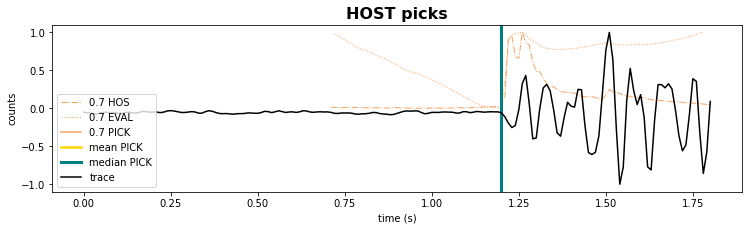

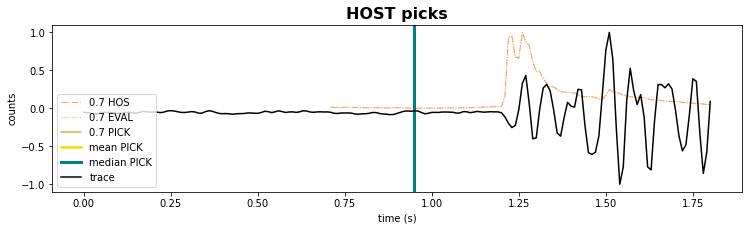

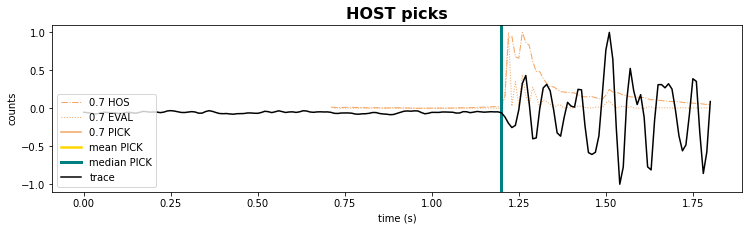

In [8]:
# ---- AIC
HP = Host(tr, 0.7, hos_method='kurtosis')  # also 'kurt' and 'k' works ... 
HP.set_detection_method('aic')  # default, case insensitive 
HP.work(debug_plot=True)

# ---- MIN
HP.set_detection_method('min')  # case insensitive
HP.work(debug_plot=True)

# ---- DIFF / GAUSS
HP.set_detection_method('diff') # case insensitive, also 'gauss' works .. 
HP.set_diffgauss_threshold(2.5)
HP.work(debug_plot=True)

As you can see, not all the methods are suitable with the same HOS-CF (in this case a simple _kurtosis_ in single-window). The `AIC` method properly detect the singal-change in the kurtosis function. Also the `DIFF` method success with a clear detection of an impulsive signal-change in the first-derivative function (exceeding 2.5 times the function thresholds).
Outsider is the `MIN` method, as it simply return the minimum value of the HOS-CF (again, in this case only the _kurtosis_) without further assessment.

Check the following books to discover the additional possibilities of HOST-CF transformations.

### References
    
- Baillard, C., Crawford, W.C., Ballu, V., Hibert, C. and Mangeney, A., 2014. An automatic kurtosis‐based P‐and S‐phase picker designed for local seismic networks. Bulletin of the Seismological Society of America, 104(1), pp.394-409.
- Saragiotis, C.D., Hadjileontiadis, L.J. & Panas, S.M., 2002. PAI-S/K: a robust automatic seismic P phase arrival identification scheme, IEEE Trans. Geosci. Remote Sens. 40, 1395–1404.

